In [3]:
from datasets import load_dataset

case_hold = load_dataset("lex_glue", "case_hold")
print(case_hold["train"][1])  # View first sample

{'context': 'Colameta used customer information that he took from Protégé. Additionally, Colameta admits to having taken at least two Protégé proposals with him to Monument. This type of information may constitute trade secrets. See G.L.c. 266, §30 (defining “trade secret” as used in G.L.c. 93, §42, as including “anything tangible or intangible or electronically kept or stored, which constitutes, represents, evidences or records a secret scientific, technical, merchandising, production or management information, design, process, procedure, formula, invention or improvement”); Warner-Lambert Co., 427 Mass. at 49 (“ [Confidential and proprietary business information may be entitled to protection, even if such information cannot claim trade secret protection”); see, e.g., Augat, Inc., 409 Mass. at 173 (<HOLDING>). “Matters of public knowledge or of general', 'endings': ['recognizing that even if a plaintiff claims certain information constitutes trade secrets its claim may not depend on t

In [4]:
# Get dataset statistics and structure
print("Dataset structure:", case_hold)
print("\nAvailable splits:", case_hold.keys())

Dataset structure: DatasetDict({
    train: Dataset({
        features: ['context', 'endings', 'label'],
        num_rows: 45000
    })
    test: Dataset({
        features: ['context', 'endings', 'label'],
        num_rows: 3600
    })
    validation: Dataset({
        features: ['context', 'endings', 'label'],
        num_rows: 3900
    })
})

Available splits: dict_keys(['train', 'test', 'validation'])


In [5]:
import os
import pandas as pd

# Define your custom path
output_dir = "C:/Users/Manan/Desktop/case_hold_csv"

# Create directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")

# Save each split as CSV
for split in case_hold.keys():
    df = pd.DataFrame(case_hold[split])
    csv_path = os.path.join(output_dir, f"case_hold_{split}.csv")
    df.to_csv(csv_path, index=False)


Created directory: C:/Users/Manan/Desktop/case_hold_csv


In [12]:
from datasets import load_dataset

ecthr_a = load_dataset("lex_glue", "ecthr_a")
print(ecthr_a["train"][1])  # View first sample

train-00000-of-00001.parquet:   0%|          | 0.00/42.4M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/5.68M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/5.26M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1000 [00:00<?, ? examples/s]

{'text': ['9.  The applicant is the monarch of Liechtenstein, born in 1945 and living in Vaduz (Liechtenstein).', '10.  The applicant’s late father, the former monarch of Liechtenstein, had been the owner of the painting Szene an einem römischen Kalkofen (alias Der große Kalkofen) of Pieter van Laer, which had formed part of his family’s art collection since at least 1767. Until the end of the Second World War the painting had been in one of the family’s castles on the territory of the now Czech Republic.', '11.  In 1946 the former Czechoslovakia confiscated the property of the applicant’s father which was situated in its territory, including the painting in question, under Decree no. 12 on the “confiscation and accelerated allocation of agricultural property of German and Hungarian persons and of those having committed treason and acted as enemies of the Czech and Slovak people” (dekretu prezidenta republiky č. 12/1945 Sb. o konfiskaci a urychleném rozdělení majetku Němců, Mad’arů, zr

In [14]:
# Get dataset statistics and structure
print("Dataset structure:", ecthr_a)
print("\nAvailable splits:", ecthr_a.keys())

Dataset structure: DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 9000
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 1000
    })
    validation: Dataset({
        features: ['text', 'labels'],
        num_rows: 1000
    })
})

Available splits: dict_keys(['train', 'test', 'validation'])


In [1]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

c:\Users\manan\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\manan\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
# Get sample text from the dataset
sample_text = case_hold["train"][0]["context"]
print("Original text sample:")
print(sample_text[:500] + "...\n")  # Show first 500 chars

Original text sample:
Drapeau’s cohorts, the cohort would be a “victim” of making the bomb. Further, firebombs are inherently dangerous. There is no peaceful purpose for making a bomb. Felony offenses that involve explosives qualify as “violent crimes” for purposes of enhancing the sentences of career offenders. See 18 U.S.C. § 924(e)(2)(B)(ii) (defining a “violent felony” as: “any crime punishable by imprisonment for a term exceeding one year ... that ... involves use of explosives”). Courts have found possession of...



## Basic Pre Processing 

In [6]:
# 1. Tokenization - Sentence Level
sentences = sent_tokenize(sample_text)
print(f"Sentence Tokenization (first 3 of {len(sentences)} sentences):")
for i, sentence in enumerate(sentences[:3]):
    print(f"Sentence {i+1}: {sentence}")
print()

# 2. Tokenization - Word Level
words = word_tokenize(sample_text)
print(f"Word Tokenization (first 20 of {len(words)} words):")
print(words[:20])
print()

Sentence Tokenization (first 3 of 9 sentences):
Sentence 1: Drapeau’s cohorts, the cohort would be a “victim” of making the bomb.
Sentence 2: Further, firebombs are inherently dangerous.
Sentence 3: There is no peaceful purpose for making a bomb.

Word Tokenization (first 20 of 189 words):
['Drapeau', '’', 's', 'cohorts', ',', 'the', 'cohort', 'would', 'be', 'a', '“', 'victim', '”', 'of', 'making', 'the', 'bomb', '.', 'Further', ',']



In [7]:
# 3. Converting to lowercase
words_lower = [word.lower() for word in words]
print("After converting to lowercase (first 20):")
print(words_lower[:20])
print()

After converting to lowercase (first 20):
['drapeau', '’', 's', 'cohorts', ',', 'the', 'cohort', 'would', 'be', 'a', '“', 'victim', '”', 'of', 'making', 'the', 'bomb', '.', 'further', ',']



In [8]:
# 4. Stopword Removal
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words_lower if word.isalnum() and word not in stop_words]
print(f"After stopword removal (first 20 of {len(filtered_words)} words):")
print(filtered_words[:20])
print()

After stopword removal (first 20 of 80 words):
['drapeau', 'cohorts', 'cohort', 'would', 'victim', 'making', 'bomb', 'firebombs', 'inherently', 'dangerous', 'peaceful', 'purpose', 'making', 'bomb', 'felony', 'offenses', 'involve', 'explosives', 'qualify', 'violent']



In [13]:
# 5. Frequency Distribution and Word Count
word_freq = Counter(filtered_words)
print(f"Total unique words after preprocessing: {len(word_freq)}")
print("\nMost common 15 words:")
for word, count in word_freq.most_common(15):
    print(f"{word}: {count}")

Total unique words after preprocessing: 67

Most common 15 words:
bomb: 4
would: 2
making: 2
purpose: 2
felony: 2
explosives: 2
violent: 2
see: 2
crime: 2
united: 2
states: 2
drapeau: 1
cohorts: 1
cohort: 1
victim: 1


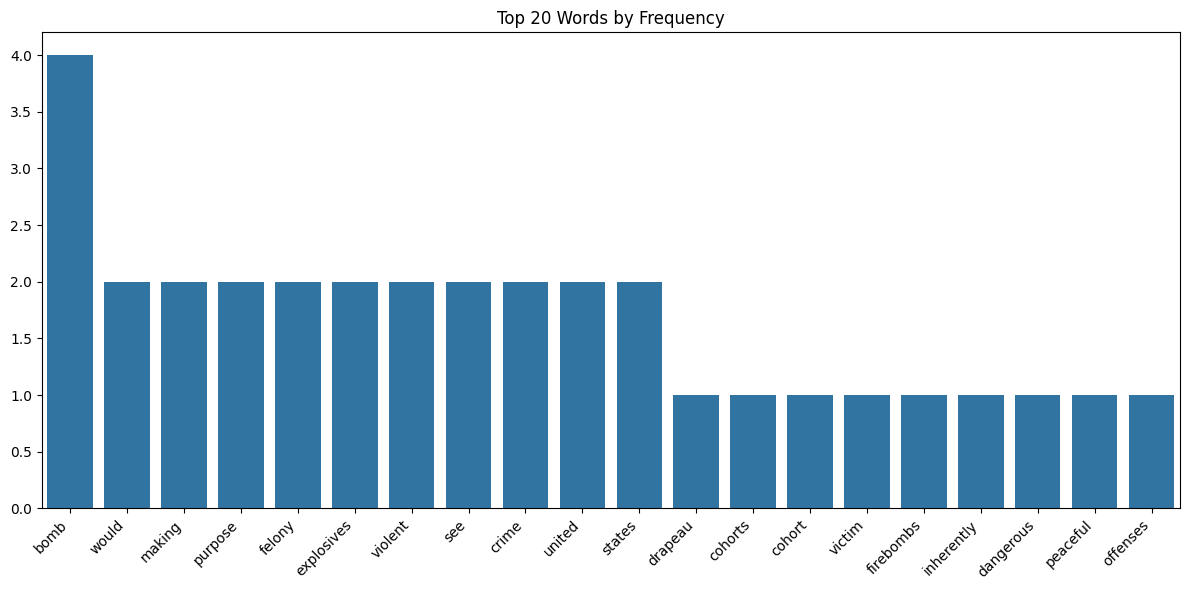

In [10]:
# 6. Visualize frequency distribution
plt.figure(figsize=(12, 6))
top_words = dict(word_freq.most_common(20))
sns.barplot(x=list(top_words.keys()), y=list(top_words.values()))
plt.title('Top 20 Words by Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Word frequency dataframe (top 10 rows):
         Word  Frequency
0        bomb          4
1       would          2
2      making          2
3     purpose          2
4      felony          2
5  explosives          2
6     violent          2
7         see          2
8       crime          2
9      united          2


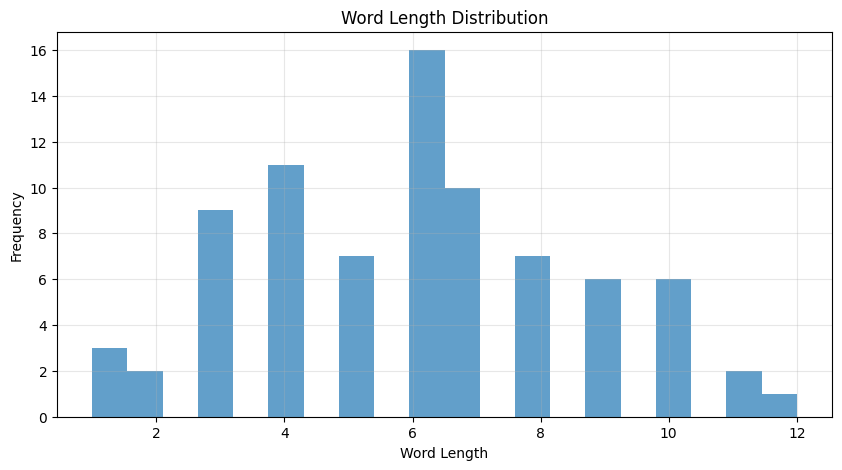


Average word length after preprocessing: 6.04 characters


In [11]:
# 7. Create a DataFrame for better analysis
word_freq_df = pd.DataFrame(word_freq.most_common(), columns=['Word', 'Frequency'])
print("\nWord frequency dataframe (top 10 rows):")
print(word_freq_df.head(10))

# 8. Word length distribution
word_lengths = [len(word) for word in filtered_words]
plt.figure(figsize=(10, 5))
plt.hist(word_lengths, bins=20, alpha=0.7)
plt.title('Word Length Distribution')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nAverage word length after preprocessing: {sum(word_lengths)/len(word_lengths):.2f} characters")